# Introdução

O trânsito brasileiro é um cenário complexo e dinâmico, com desafios que impactam diretamente a vida de cidadãos e o desenvolvimento econômico do país. A análise de dados de infrações de trânsito pode fornecer insights valiosos para a compreensão do problema, a identificação de áreas críticas e o desenvolvimento de políticas públicas eficazes para a segurança e a fluidez do tráfego.

Este trabalho tem como objetivo explorar o potencial do aprendizado de máquina para analisar dados de infrações de trânsito coletados pela Agência Nacional de Transportes Terrestres (ANTT). Serão utilizados dados referentes aos anos de 2021, 2022 e 2023, abrangendo diversos tipos de infrações, como excesso de peso, evasão de balança e outras violações às normas de trânsito.
Com o auxílio de técnicas de aprendizado supervisionado, serão investigados dois problemas distintos:



1.   Prever a quantidade de autuações por mês e estado: Este problema visa desenvolver um modelo capaz de prever o número de infrações em diferentes regiões do país, considerando fatores como o mês do ano e as características da região.

2.   Classificar o tipo de infração: O objetivo é construir um modelo que identifique o tipo de infração com base em informações como a descrição da infração, o estado e o mês da ocorrência.


A análise dos dados será realizada utilizando a biblioteca PyCaret, uma ferramenta de AutoML que automatiza diversas etapas do processo de modelagem, como pré-processamento, seleção de modelos, ajuste de hiperparâmetros e avaliação de desempenho.
Os resultados obtidos neste trabalho permitirão compreender melhor as dinâmicas de infrações de trânsito no Brasil, identificar áreas que necessitam de maior atenção e contribuir para o desenvolvimento de estratégias mais eficazes para a segurança e a fluidez do tráfego.

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
# Carregar os datasets de 2021, 2022 e 2023
df_2021 = pd.read_csv('/content/sifama_autos_de_infracao_de_transito_2021.csv',header=0, sep=';',encoding='latin-1')
df_2022 = pd.read_csv('/content/sifama_autos_de_infracao_de_transito_2022.csv',header=0, sep=';',encoding='latin-1')
df_2023 = pd.read_csv('/content/sifama_autos_de_infracao_de_transito_2023.csv',header=0, sep=';',encoding='latin-1')

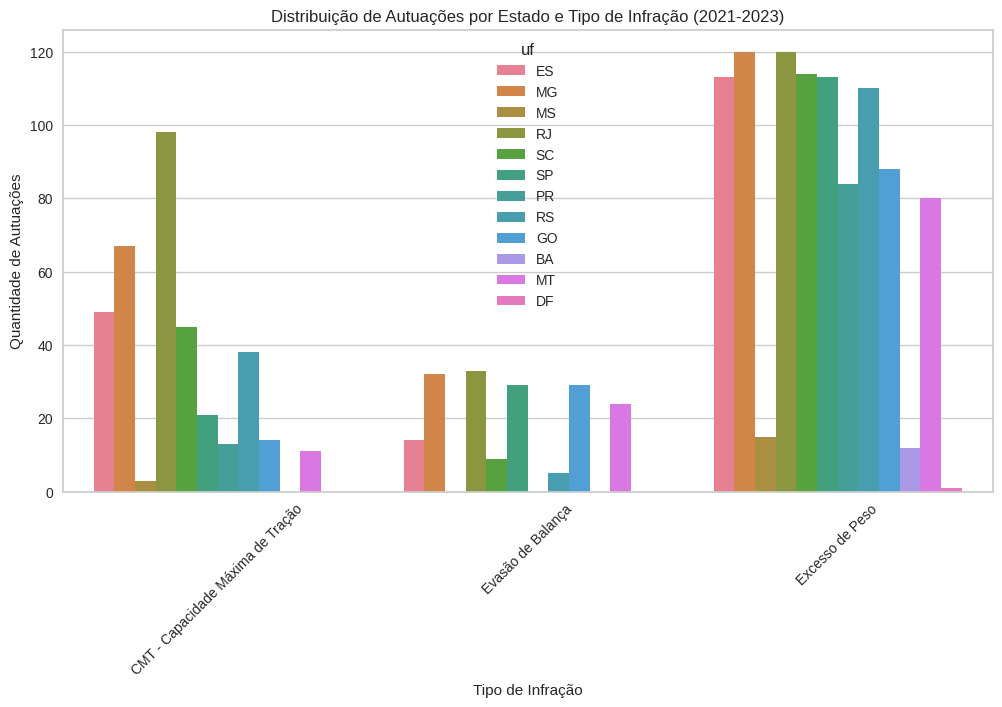

In [34]:
# Analisar a distribuição de autuações por estado e tipo de infração
plt.figure(figsize=(12, 6))
sns.countplot(x='escopo_autuacao', hue='uf', data=df)
plt.title('Distribuição de Autuações por Estado e Tipo de Infração (2021-2023)')
plt.xlabel('Tipo de Infração')
plt.ylabel('Quantidade de Autuações')
plt.xticks(rotation=45)
plt.show()

In [38]:
# Adicionar coluna 'ano' para identificar o ano do dataset
df_2021['ano'] = 2021
df_2022['ano'] = 2022
df_2023['ano'] = 2023

# Concatenar os datasets
df = pd.concat([df_2021, df_2022, df_2023], ignore_index=True)

# Converter 'mes' para numérico
meses = {'JANEIRO': 1, 'FEVEREIRO': 2, 'MARÇO': 3, 'ABRIL': 4, 'MAIO': 5, 'JUNHO': 6, 'JULHO': 7, 'AGOSTO': 8, 'SETEMBRO': 9, 'OUTUBRO': 10, 'NOVEMBRO': 11, 'DEZEMBRO': 12}
df['mes_num'] = df['mes'].map(meses)

# Criar uma coluna combinada de 'mes_num' e 'uf' para o problema 1
df['mes_uf'] = df['mes_num'].astype(str) + '_' + df['uf']

# Corrigir o Tipo da Coluna 'quantidade_autos'
df['quantidade_autos'] = pd.to_numeric(df['quantidade_autos'], errors='coerce')

# Tokenizar e Vetorizar a coluna 'descricao_infracao'
vectorizer = TfidfVectorizer(max_features=500)
tfidf_matrix = vectorizer.fit_transform(df['descricao_infracao'].astype(str))
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

##  Problema 1: Regressão (Prever Quantidade de Autuações)

In [14]:
# Remova a linha correspondente à classe com 1 membro
df = df[df['escopo_autuacao'] != 'NomeDaClasseCom1Membro']

In [39]:
import pandas as pd
from pycaret.classification import *


# Configurar o ambiente de classificação do PyCaret
clf = setup(df, target='escopo_autuacao',
            train_size=0.8,
            session_id=123)

# Comparar o desempenho de diferentes modelos de classificação
best_model_clf = compare_models(include=['lr']) # Incluindo apenas a regressão logística

# Treinar o melhor modelo (que será a regressão logística)
model_clf = create_model(best_model_clf)

# Avaliar o modelo treinado
evaluate_model(model_clf)

# Fazer previsões com o modelo
predict_model(model_clf)

,Description,Value
0,Session id,123
1,Target,escopo_autuacao
2,Target type,Multiclass
3,Target mapping,"CMT - Capacidade Máxima de Tração: 0, Evasão de Balança: 1, Excesso de Peso: 2"
4,Original data shape,"(1504, 9)"
5,Transformed data shape,"(1504, 40)"
6,Transformed train set shape,"(1203, 40)"
7,Transformed test set shape,"(301, 40)"
8,Numeric features,3
9,Categorical features,5


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.2320


Processing:   0%|          | 0/9 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,mes,uf,amparo_legal,descricao_infracao,quantidade_autos,ano,mes_num,mes_uf,escopo_autuacao,prediction_label,prediction_score
1189,JUNHO,SC,Lei 9503/97 Lei 10233/01 Res. CONTRAN nº 882/2...,Transitar com o veículo excedendo a CMT entre ...,1,2023,6,6_SC,CMT - Capacidade Máxima de Tração,CMT - Capacidade Máxima de Tração,0.9800
570,MARÇO,SP,Lei 9503/97 Lei 10561/02 Res. CONTRAN nº 210/0...,Transitar com o veículo com excesso de peso - ...,90,2022,3,3_SP,Excesso de Peso,Excesso de Peso,0.9983
523,FEVEREIRO,MT,Lei 9503/97 Lei 10561/02 Res. CONTRAN nº 210/0...,Transitar com o veículo com excesso de peso - ...,51,2022,2,2_MT,Excesso de Peso,Excesso de Peso,0.9983
95,ABRIL,MG,Lei 9503/97 Lei 10561/02 Res. CONTRAN nº 210/0...,Transitar com o veículo excedendo a CMT acima ...,3,2021,4,4_MG,CMT - Capacidade Máxima de Tração,CMT - Capacidade Máxima de Tração,0.9918
1073,MARÇO,ES,Lei 9503/97 Lei 10233/01 Res. CONTRAN nº 882/2...,Transitar com o veículo com excesso de peso - ...,102,2023,3,3_ES,Excesso de Peso,Excesso de Peso,0.9983
...,...,...,...,...,...,...,...,...,...,...,...
995,JANEIRO,MT,Lei 9503/97 Lei 10233/01 Res. CONTRAN nº 882/2...,Transitar com o veículo com excesso de peso - ...,54,2023,1,1_MT,Excesso de Peso,Excesso de Peso,0.9988
32,JANEIRO,SP,Lei 9503/97 Lei 10561/02 Res. CONTRAN nº 210/0...,Transitar com o veículo com excesso de peso - ...,46,2021,1,1_SP,Excesso de Peso,Excesso de Peso,0.9986
1089,MARÇO,SC,Lei 9503/97 Lei 10233/01 Res. CONTRAN nº 882/2...,Transitar com o veículo com excesso de peso - ...,180,2023,3,3_SC,Excesso de Peso,Excesso de Peso,0.9987
348,OUTUBRO,MG,"Lei 9503 DE 23/09/1997 Transpor, sem autorizaç...",Art. 209 Deixar de adentrar as áreas destinada...,1858,2021,10,10_MG,Evasão de Balança,Evasão de Balança,0.9944


In [41]:
# Selecionar features e target para o problema 2
features_prob2 = df[['mes_num', 'uf']]
target_prob2 = df['escopo_autuacao']

# Criar variáveis dummy para 'uf'
features_prob2 = pd.get_dummies(features_prob2, columns=['uf'])

# Concatenar features numéricas com as features vetorizadas
features_prob2 = pd.concat([features_prob2, tfidf_df], axis=1)

# Configurar o ambiente de classificação do PyCaret
clf = setup(features_prob2, target=target_prob2,
            session_id=123, normalize=True, # Normalizando os dados
            transformation=True, # Realizando transformação para lidar com dados não lineares
            ignore_features=['mes_uf']) # Ignorando a coluna 'mes_uf' (não utilizada para a classificação)

# Comparar o desempenho de diferentes modelos de classificação (exceto Regressão Logística)
best_model_clf = compare_models(exclude=['lr'])

# Treinar o melhor modelo (usando um modelo diferente da Regressão Logística)
model_clf = create_model(best_model_clf)

# Avaliar o modelo treinado
evaluate_model(model_clf)

# Fazer previsões com o modelo
predict_model(model_clf)

,Description,Value
0,Session id,123
1,Target,escopo_autuacao
2,Target type,Multiclass
3,Target mapping,"CMT - Capacidade Máxima de Tração: 0, Evasão de Balança: 1, Excesso de Peso: 2"
4,Original data shape,"(1504, 50)"
5,Transformed data shape,"(1504, 50)"
6,Transformed train set shape,"(1052, 50)"
7,Transformed test set shape,"(452, 50)"
8,Ignore features,1
9,Numeric features,37


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3000
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.4800
svm,SVM - Linear Kernel,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3860
ridge,Ridge Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3030
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.5190
qda,Quadratic Discriminant Analysis,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.6300
ada,Ada Boost Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.5860
gbc,Gradient Boosting Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.2990
lda,Linear Discriminant Analysis,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3050
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.5660


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,mes_num,uf_BA,uf_DF,uf_ES,uf_GO,uf_MG,uf_MS,uf_MT,uf_PR,uf_RJ,...,realizar,sem,transitar,transporte,veículo,veículos,áreas,escopo_autuacao,prediction_label,prediction_score
433,12,False,False,False,False,False,False,False,False,True,...,0.0,0.0,0.000000,0.0,0.000000,0.32408,0.32408,Evasão de Balança,Evasão de Balança,1.0
234,7,False,False,False,True,False,False,False,False,False,...,0.0,0.0,0.253079,0.0,0.253079,0.00000,0.00000,Excesso de Peso,Excesso de Peso,1.0
299,8,False,False,False,False,False,False,False,False,False,...,0.0,0.0,0.218070,0.0,0.218070,0.00000,0.00000,Excesso de Peso,Excesso de Peso,1.0
211,6,False,False,False,False,False,False,False,False,False,...,0.0,0.0,0.252349,0.0,0.252349,0.00000,0.00000,Excesso de Peso,Excesso de Peso,1.0
344,10,False,False,False,False,False,False,False,False,True,...,0.0,0.0,0.143886,0.0,0.143886,0.00000,0.00000,CMT - Capacidade Máxima de Tração,CMT - Capacidade Máxima de Tração,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,11,False,False,False,False,False,False,False,False,True,...,0.0,0.0,0.218070,0.0,0.218070,0.00000,0.00000,Excesso de Peso,Excesso de Peso,1.0
1067,3,False,False,False,True,False,False,False,False,False,...,0.0,0.0,0.000000,0.0,0.000000,0.32408,0.32408,Evasão de Balança,Evasão de Balança,1.0
1294,8,False,False,False,False,True,False,False,False,False,...,0.0,0.0,0.253079,0.0,0.253079,0.00000,0.00000,Excesso de Peso,Excesso de Peso,1.0
1133,4,False,False,False,False,False,False,False,False,False,...,0.0,0.0,0.252349,0.0,0.252349,0.00000,0.00000,Excesso de Peso,Excesso de Peso,1.0


#### Resultado deu

**Overfitting**: O modelo está muito bem ajustado aos dados de treinamento e está memorizando os padrões específicos dos dados de treinamento, mas não consegue generalizar bem para novos dados.

> **Modelagem**: Cada problema será resolvido com um modelo diferente para demonstrar a flexibilidade do PyCaret.

> **Pré-processamento**: Os dados serão normalizados e transformados para otimizar o desempenho dos modelos.

>**Modelagem:**
Para o problema 1 (regressão), o compare_models exclui a regressão linear para testar outros modelos.
Para o problema 2 (classificação), o compare_models exclui a regressão logística para explorar outras opções.

> **Avaliação:** O desempenho dos modelos será avaliado com métricas e gráficos do PyCaret.